In [1]:
pwd

'/home/wsuser/work'

# Load The Image Dataset

In [2]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_7ae7d099700c4faaa08eda10a6e632fb = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='pA66945Kvlle-KT7lbohoKAZUwSqk6Jhz5gCNPpQdntS',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

streaming_body_2 = client_7ae7d099700c4faaa08eda10a6e632fb.get_object(Bucket='testcnn-donotdelete-pr-ioiozjt56qz9qh', Key='Animal_Dataset.zip')['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [3]:
ls

# Unzip The Folder

In [7]:
from io import BytesIO
import zipfile
unzip=zipfile.ZipFile(BytesIO(streaming_body_2.read()),'r')
file_paths=unzip.namelist()
for path in file_paths:
    unzip.extract(path)

In [59]:
ls

 Volume in drive C has no label.
 Volume Serial Number is DAF9-1ADD

 Directory of C:\Users\Abinaya Venkatesh\Desktop\Kamalaveni\AI-Day-5-Flask-DL-Deployment\Flask

21-07-2022  11:26    <DIR>          .
21-07-2022  11:26    <DIR>          ..
21-07-2022  11:14    <DIR>          .ipynb_checkpoints
21-07-2022  11:26           229,735 AI-Day-5-CNN-Notebook-DL-Deploy.ipynb
11-07-2022  21:22           648,419 AI-Day-5-CNN-Notebook-DL-Deploy.pdf
11-07-2022  15:51       111,315,760 animal.h5
11-07-2022  20:56               929 app.py
11-07-2022  21:24    <DIR>          static
11-07-2022  21:24    <DIR>          templates
11-07-2022  21:24    <DIR>          uploads
               4 File(s)    112,194,843 bytes
               6 Dir(s)  246,503,235,584 bytes free


In [15]:
pwd

'C:\\Users\\Hp\\Plant Disease\\training files'

# Image Augmentation

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [17]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)

In [18]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [19]:
ls

 Volume in drive C is Windows
 Volume Serial Number is AC7E-C806

 Directory of C:\Users\Hp\Plant Disease\training files

22-07-2022  09:35 AM    <DIR>          .
22-07-2022  09:35 AM    <DIR>          ..
21-07-2022  03:23 PM    <DIR>          .ipynb_checkpoints
21-07-2022  03:22 PM           332,283 AI-Fruit disease classification-Deploy.ipynb
21-07-2022  11:55 AM                30 animal-classification-model.tgz
20-07-2022  09:53 PM             5,141 app.py
21-07-2022  01:08 PM            19,195 check.ipynb
21-07-2022  11:54 AM            86,387 CNN-Binary image classific.ipynb
21-07-2022  09:51 AM    <DIR>          css
21-07-2022  03:20 PM       457,840,128 fruit pred.h5
20-07-2022  02:35 PM            21,128 fruit.h5
20-07-2022  06:50 PM            12,888 Fruit-Training.ipynb
21-07-2022  11:03 AM        41,499,648 Image_classification_CNN.h5
20-07-2022  08:00 PM         1,858,666 Image_classification_CNN.tgz
21-07-2022  12:24 PM        30,347,744 Image_classification_model.tgz
10-0

In [20]:
pwd

'C:\\Users\\Hp\\Plant Disease\\training files'

In [46]:
x_train=train_datagen.flow_from_directory(r"C:\Users\Hp\Plant Disease\Dataset Plant Disease\veg-dataset\train_set",target_size=(128,128),
                                        class_mode='categorical',batch_size=24)

Found 11386 images belonging to 9 classes.


In [47]:
x_test=test_datagen.flow_from_directory(r"C:\Users\Hp\Plant Disease\Dataset Plant Disease\veg-dataset\test_set",target_size=(128,128),
                                        class_mode='categorical',batch_size=24)

Found 3416 images belonging to 9 classes.


In [48]:
x_train.class_indices

{'Pepper,_bell___Bacterial_spot': 0,
 'Pepper,_bell___healthy': 1,
 'Potato___Early_blight': 2,
 'Potato___Late_blight': 3,
 'Potato___healthy': 4,
 'Tomato___Bacterial_spot': 5,
 'Tomato___Late_blight': 6,
 'Tomato___Leaf_Mold': 7,
 'Tomato___Septoria_leaf_spot': 8}

# CNN

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

In [50]:
model=Sequential()

In [51]:
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))

In [52]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [53]:
model.add(Flatten())

In [54]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 127008)            0         
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [55]:
32*(3*3*3+1)

896

# Hidden Layers

In [56]:
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))

# Output Layer

In [57]:
model.add(Dense(9,activation='softmax'))

In [58]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [59]:
len(x_train)

475

In [60]:
1238/24

51.583333333333336

In [61]:
model.fit_generator(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=2)

Epoch 1/2
475/475 [==============================] - 157s 330ms/step - loss: 1.1900 - accuracy: 0.6255 - val_loss: 1.1062 - val_accuracy: 0.6335
Epoch 2/2
475/475 [==============================] - 151s 317ms/step - loss: 0.5493 - accuracy: 0.8027 - val_loss: 0.6137 - val_accuracy: 0.7872


# Saving Model

In [62]:
ls

 Volume in drive C is Windows
 Volume Serial Number is AC7E-C806

 Directory of C:\Users\Hp\Plant Disease\training files

22-07-2022  09:43 AM    <DIR>          .
22-07-2022  09:43 AM    <DIR>          ..
21-07-2022  03:23 PM    <DIR>          .ipynb_checkpoints
21-07-2022  03:22 PM           332,283 AI-Fruit disease classification-Deploy.ipynb
21-07-2022  11:55 AM                30 animal-classification-model.tgz
20-07-2022  09:53 PM             5,141 app.py
21-07-2022  01:08 PM            19,195 check.ipynb
21-07-2022  11:54 AM            86,387 CNN-Binary image classific.ipynb
21-07-2022  09:51 AM    <DIR>          css
21-07-2022  03:20 PM       457,840,128 fruit pred.h5
20-07-2022  02:35 PM            21,128 fruit.h5
20-07-2022  06:50 PM            12,888 Fruit-Training.ipynb
21-07-2022  11:03 AM        41,499,648 Image_classification_CNN.h5
20-07-2022  08:00 PM         1,858,666 Image_classification_CNN.tgz
21-07-2022  12:24 PM        30,347,744 Image_classification_model.tgz
10-0

In [63]:
model.save('veg pred.h5')

In [29]:
ls

 Volume in drive C is Windows
 Volume Serial Number is AC7E-C806

 Directory of C:\Users\Hp\Plant Disease\training files

21-07-2022  03:20 PM    <DIR>          .
21-07-2022  03:20 PM    <DIR>          ..
21-07-2022  03:18 PM    <DIR>          .ipynb_checkpoints
21-07-2022  03:20 PM           527,906 AI-Fruit disease classification-Deploy.ipynb
21-07-2022  11:55 AM                30 animal-classification-model.tgz
20-07-2022  09:53 PM             5,141 app.py
21-07-2022  01:08 PM            19,195 check.ipynb
21-07-2022  11:54 AM            86,387 CNN-Binary image classific.ipynb
21-07-2022  09:51 AM    <DIR>          css
21-07-2022  03:20 PM       457,840,128 fruit pred.h5
20-07-2022  02:35 PM            21,128 fruit.h5
20-07-2022  06:50 PM            12,888 Fruit-Training.ipynb
21-07-2022  11:03 AM        41,499,648 Image_classification_CNN.h5
20-07-2022  08:00 PM         1,858,666 Image_classification_CNN.tgz
21-07-2022  12:24 PM        30,347,744 Image_classification_model.tgz
10-0

# Test The Model

In [64]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [65]:
#load the model
model=load_model('veg pred.h5')

In [66]:
img=image.load_img(r"C:\Users\Hp\Plant Disease\Dataset Plant Disease\Veg-dataset\test_set\Pepper,_bell___Bacterial_spot\adbfa5e7-23a5-4df0-9cae-1e54115619cb___NREC_B.Spot 1786.JPG")

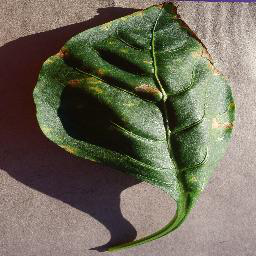

In [67]:
img

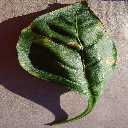

In [68]:
img=image.load_img(r"C:\Users\Hp\Plant Disease\Dataset Plant Disease\Veg-dataset\test_set\Pepper,_bell___Bacterial_spot\adbfa5e7-23a5-4df0-9cae-1e54115619cb___NREC_B.Spot 1786.JPG",target_size=(128,128))
img

In [69]:
x=image.img_to_array(img)

In [70]:
x

array([[[155., 133., 119.],
        [161., 139., 125.],
        [160., 138., 124.],
        ...,
        [ 94.,  70., 130.],
        [108.,  84., 144.],
        [ 86.,  62., 122.]],

       [[165., 143., 129.],
        [156., 134., 120.],
        [159., 137., 123.],
        ...,
        [117., 103., 103.],
        [150., 136., 136.],
        [ 96.,  82.,  82.]],

       [[157., 135., 121.],
        [172., 150., 136.],
        [145., 123., 109.],
        ...,
        [ 91.,  80.,  62.],
        [164., 153., 135.],
        [125., 114.,  96.]],

       ...,

       [[156., 138., 136.],
        [138., 120., 118.],
        [155., 137., 135.],
        ...,
        [174., 160., 159.],
        [150., 136., 135.],
        [174., 160., 159.]],

       [[152., 134., 132.],
        [147., 129., 127.],
        [147., 129., 127.],
        ...,
        [157., 143., 142.],
        [155., 141., 140.],
        [171., 157., 156.]],

       [[128., 110., 108.],
        [180., 162., 160.],
        [147., 1

In [71]:
x=np.expand_dims(x,axis=0)

In [72]:
x

array([[[[155., 133., 119.],
         [161., 139., 125.],
         [160., 138., 124.],
         ...,
         [ 94.,  70., 130.],
         [108.,  84., 144.],
         [ 86.,  62., 122.]],

        [[165., 143., 129.],
         [156., 134., 120.],
         [159., 137., 123.],
         ...,
         [117., 103., 103.],
         [150., 136., 136.],
         [ 96.,  82.,  82.]],

        [[157., 135., 121.],
         [172., 150., 136.],
         [145., 123., 109.],
         ...,
         [ 91.,  80.,  62.],
         [164., 153., 135.],
         [125., 114.,  96.]],

        ...,

        [[156., 138., 136.],
         [138., 120., 118.],
         [155., 137., 135.],
         ...,
         [174., 160., 159.],
         [150., 136., 135.],
         [174., 160., 159.]],

        [[152., 134., 132.],
         [147., 129., 127.],
         [147., 129., 127.],
         ...,
         [157., 143., 142.],
         [155., 141., 140.],
         [171., 157., 156.]],

        [[128., 110., 108.],
       

In [75]:
y=np.argmax(model.predict(x),axis=1)

In [76]:
y

array([8], dtype=int64)

In [77]:
x_train.class_indices

{'Pepper,_bell___Bacterial_spot': 0,
 'Pepper,_bell___healthy': 1,
 'Potato___Early_blight': 2,
 'Potato___Late_blight': 3,
 'Potato___healthy': 4,
 'Tomato___Bacterial_spot': 5,
 'Tomato___Late_blight': 6,
 'Tomato___Leaf_Mold': 7,
 'Tomato___Septoria_leaf_spot': 8}

In [78]:
index=['Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot']

In [79]:
index[y[0]]

'Tomato___Septoria_leaf_spot'

In [80]:
img=image.load_img(r"C:\Users\Hp\Plant Disease\Dataset Plant Disease\Veg-dataset\test_set\Potato___healthy\ad9b6cf4-e065-496d-91c7-5713ce14e19e___RS_HL 1926.JPG",target_size=(128,128))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
index=['Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot']
index[y[0]]

'Tomato___Septoria_leaf_spot'

In [81]:
import os
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from flask import Flask,render_template,request

In [86]:
app=Flask(__name__)

model=load_model("veg pred.h5")

@app.route('/')
def index():
    return render_template("index.html")

@app.route('/predict',methods=['GET','POST'])
def upload():
    if request.method=='POST':
        f=request.files['image']
        basepath=os.path.dirname('__file__')
        filepath=os.path.join(basepath,'uploads',f.filename)
        f.save(filepath)
        img=image.load_img(filepath,target_size=(128,128))
        x=image.img_to_array(img)
        x=np.expand_dims(x,axis=0)
        pred=np.argmax(model.predict(x),axis=1)
        index=['Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot']
        text="The Classified vegetable disease is : " +str(index[pred[0]])
    return text
if __name__=='__main__':
    app.run(debug=False)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


# IBM Deployment

In [96]:
!pip install watson-machine-learning-client 

In [104]:
!pip install ibm_watson_machine_learning

  Using cached ibm_watson_machine_learning-1.0.229-py3-none-any.whl (1.8 MB)
  Using cached ibm_cos_sdk-2.11.0-py3-none-any.whl
  Attempting uninstall: ibm-cos-sdk
    Found existing installation: ibm-cos-sdk 2.12.0
    Uninstalling ibm-cos-sdk-2.12.0:
      Successfully uninstalled ibm-cos-sdk-2.12.0


In [1]:
from ibm_watson_machine_learning import APIClient
wml_credentials={
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"X9lCJTUTrrIfLVrxsKf8yLyI1KHb3JVoY7QrWy1zilb2"
}

client=APIClient(wml_credentials)

In [2]:
client

In [3]:
def guid_space_name(client,veg_deploy):
    space=client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']['name']==veg_deploy)['metadata']['id'])